<a href="https://colab.research.google.com/github/AkiahW/storytelling-with-data-1/blob/master/data-stories/Euphoria/Euphoria_Really_Complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [2]:
import csv
import webbrowser as wb
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from plotly import express as px

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Project team

Sentiment analysis of Twitter reactions after instances of Domestic Violnece on HBO's Euphoria. The team consists of Akiah Watts (AkiahW) and Saruul (Saruulijile2).

# Background and overview

This project is an analysis of two characters in the HBO show Euphoria. Since there is a consistent air time of the show, we were able to collect Twitter reactions directly after the episode aired but before the next episode. We specifically looked at reactions after episodes where each character engaged in violence toward their girlfriend.

# Approach

To explore the public perception, we manually scraped Twitter data on each of the characters of interest (Nate and McKay) in the time frame of the date the episode aired to the day before the next episode (a week). We used bar graphs and word clouds to visualize the data.

# Quick summary

Since the event of abuse wasn't isolated in the episode (Nate also threatened another character (Jules) in the episode where he physically abused his girlfriend and McKay experienced a traumatic hazing event directly before he was rough with his girlfriend) these events also colored the perception of the action. Interestingly, in McKay's case, people were generally more concerned about his mental state after his traumatic event than angry at him for how he physically took his emotions out on his girlfriend. Whereas people's tweets generally tended to have negative valence while insulting Nate and wanting to see justice served either through pressing charges or by his victims teaming up against him.



# Data

Tweets related to each character following episodes where they are physically abusive toward their girlfriends. Tweets were collected from Twitter and Akiah manually determined the valence and category of the Tweet. 

In [3]:
# Tweets for the characters McKay and Nate in show Euphoria 
# Following episodes where they commited acts of domestic abuse

mckay_url = "https://raw.githubusercontent.com/AkiahW/storytelling-with-data-1/c5b7f5e923ed0e0c2be0a91b8032084741097c25/data-stories/Euphoria/McKay%20Tweets%20-%20Sheet1.csv"
nate_url = "https://raw.githubusercontent.com/AkiahW/storytelling-with-data-1/c5b7f5e923ed0e0c2be0a91b8032084741097c25/data-stories/Euphoria/Nate%20Tweets%20-%20Sheet1.csv"

nate = pd.read_csv(nate_url)
mckay = pd.read_csv(mckay_url)

print(nate.head())
print(mckay.head())


    Source    Date                                             Search  \
0  Twitter  7-7-19  "nate" and "maddy" and "euphoria" until:2019-0...   
1  Twitter  7-9-19  "nate" and "maddy" and "euphoria" until:2019-0...   
2  Twitter  7-8-19  "nate" and "maddy" and "euphoria" until:2019-0...   
3  Twitter  7-7-19  "nate" and "maddy" and "euphoria" until:2019-0...   
4  Twitter  7-8-19  "nate" and "maddy" and "euphoria" until:2019-0...   

  Character                                            Comment  Likes  Shares  \
0      Nate  nate is not goin to jail, he's goin to prison,...    337      46   
1      Nate  cant sleep knowing nate and maddy from euphori...    308      96   
2      Nate  I had to go back and rewatch Jules and Nate sc...     62       6   
3      Nate  My thoughts tonight:\nBad bitch Kat\nReally Gi...     41       4   
4      Nate  This show is fucking sick and I love it so muc...      5       1   

    Valence  Category  
0  Negative   Justice  
1   Neutral  Shipping  
2 

# Analysis


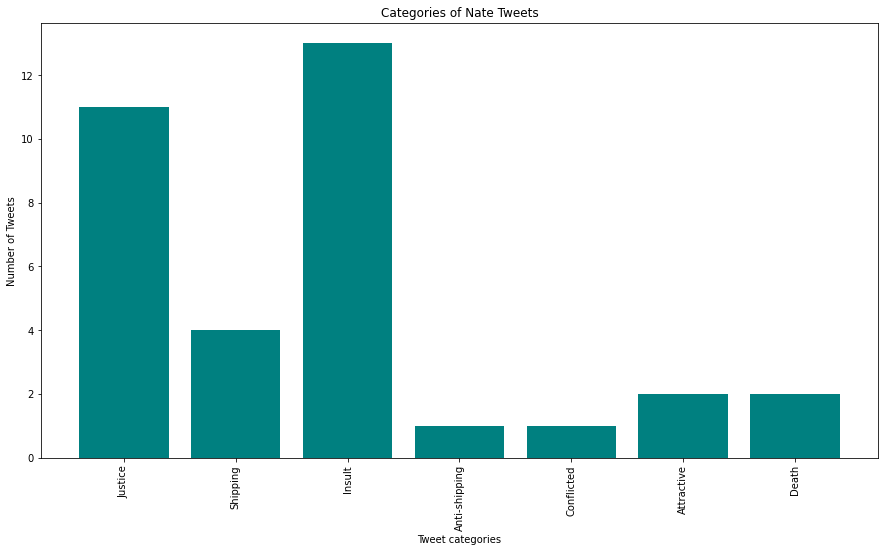

In [10]:
# Nate bar graph categories
  
df = pd.DataFrame(nate)
  
categories = list(df["Category"])

for string in categories:
  if type(string) != str:
    categories.remove(string)

frequencies = {}
for item in categories:
    if item in frequencies:
        frequencies[item] += 1
    else:
        frequencies[item] = 1
  
X = list(frequencies.keys())
Y = list(frequencies.values())

# Increase the size
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

# Plot the data using bar() method
plt.bar(X, Y, color='teal')
plt.title("Categories of Nate Tweets")
plt.xlabel("Tweet categories")
plt.ylabel("Number of Tweets")
  
# Show the plot
plt.show()

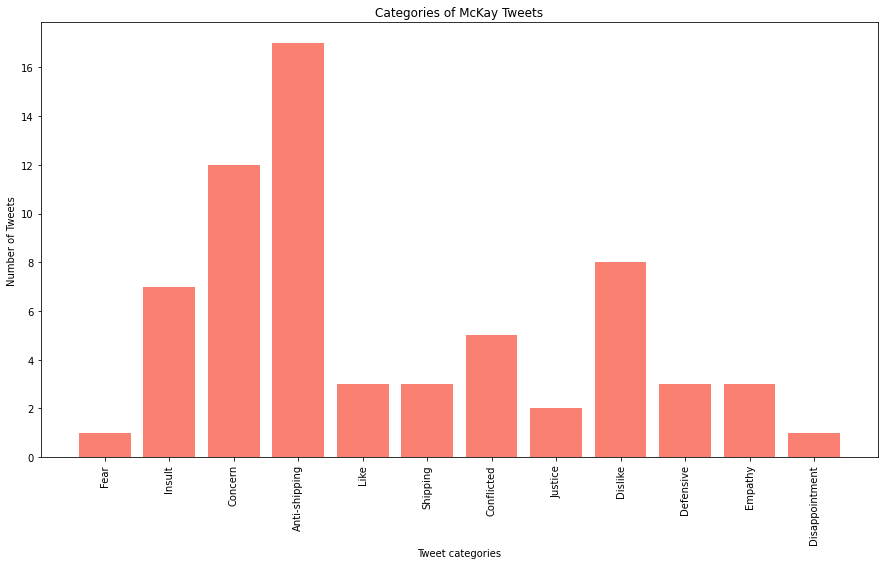

In [11]:
# McKay bar graph categories

df = pd.DataFrame(mckay)
  
categories = list(df["Category"])

frequencies = {}
for item in categories:
    if item in frequencies:
        frequencies[item] += 1
    else:
        frequencies[item] = 1
  
X = list(frequencies.keys())
Y = list(frequencies.values())

# Increase the width
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

# Plot the data using bar() method
plt.bar(X, Y, color='salmon')
plt.title("Categories of McKay Tweets")
plt.xlabel("Tweet categories")
plt.ylabel("Number of Tweets")



  
# Show the plot
plt.show()

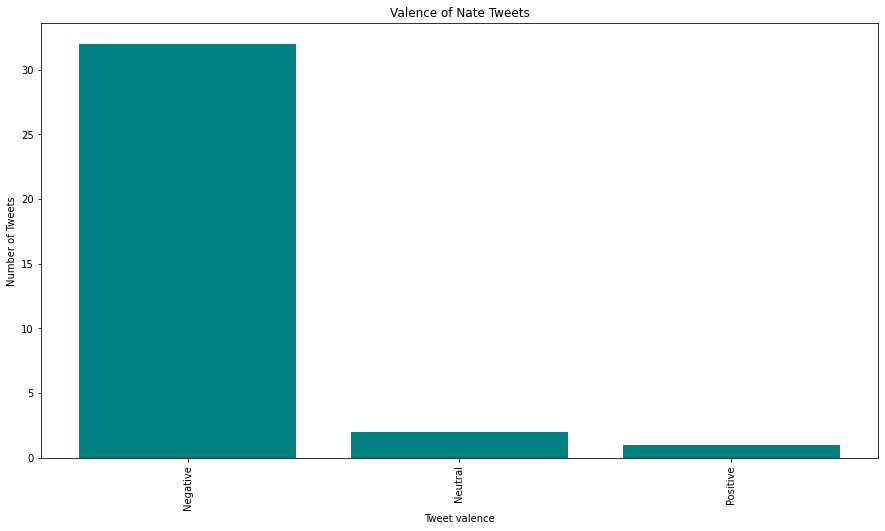

In [12]:
# Nate bar graph valence
  
df = pd.DataFrame(nate)
  
categories = list(df["Valence"])

for string in categories:
  if type(string) != str:
    categories.remove(string)

frequencies = {}
for item in categories:
    if item in frequencies:
        frequencies[item] += 1
    else:
        frequencies[item] = 1
  
X = list(frequencies.keys())
Y = list(frequencies.values())

# Increase the size
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

# Plot the data using bar() method
plt.bar(X, Y, color='teal')
plt.title("Valence of Nate Tweets")
plt.xlabel("Tweet valence")
plt.ylabel("Number of Tweets")
  
# Show the plot
plt.show()

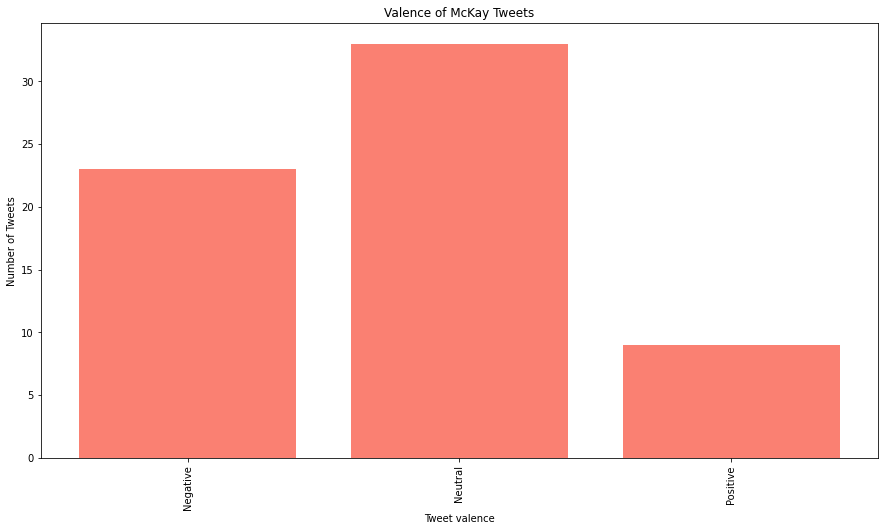

In [13]:
# McKay bar graph valence

df = pd.DataFrame(mckay)
  
categories = list(df["Valence"])

frequencies = {}
for item in categories:
    if item in frequencies:
        frequencies[item] += 1
    else:
        frequencies[item] = 1
  
X = list(frequencies.keys())
Y = list(frequencies.values())

# Increase the width
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)

# Plot the data using bar() method
plt.bar(X, Y, color='salmon')
plt.title("Valence of McKay Tweets")
plt.xlabel("Tweet valence")
plt.ylabel("Number of Tweets")



  
# Show the plot
plt.show()

In [21]:
# Nate word cloud
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Additional words to remove
stopword.add('euphoria')
stopword.add('euphoriahbo')
stopword.add('nate')
stopword.add('jules')
stopword.add('jule')
stopword.add('rue')
stopword.add('episode')
stopword.add('go')
stopword.add('bitch')
stopword.add('ass')
stopword.add('shit')
stopword.add('fuck')
stopword.add('im')

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
nate["Comment"] = nate["Comment"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


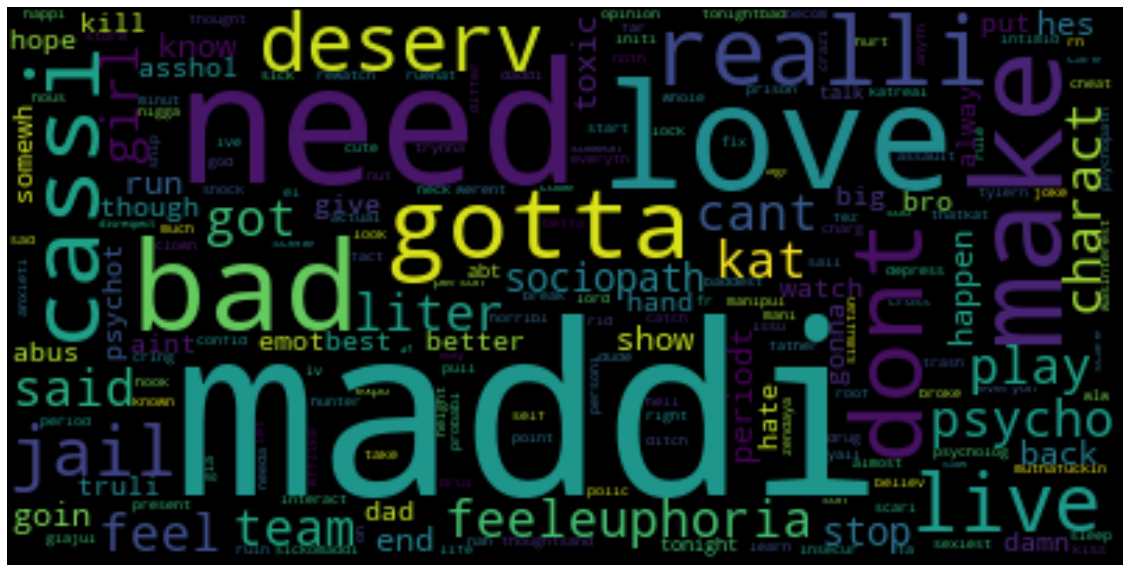

In [22]:
text = " ".join(i for i in nate.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# McKay word cloud
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

# Additional words to remove
stopword.add('euphoria')
stopword.add('euphoriahbo')
stopword.add('mckay')
stopword.add('episode')
stopword.add('episodes')
stopword.add('watch')
stopword.add('im')
stopword.add('fuck')


def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
mckay["Comment"] = mckay["Comment"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


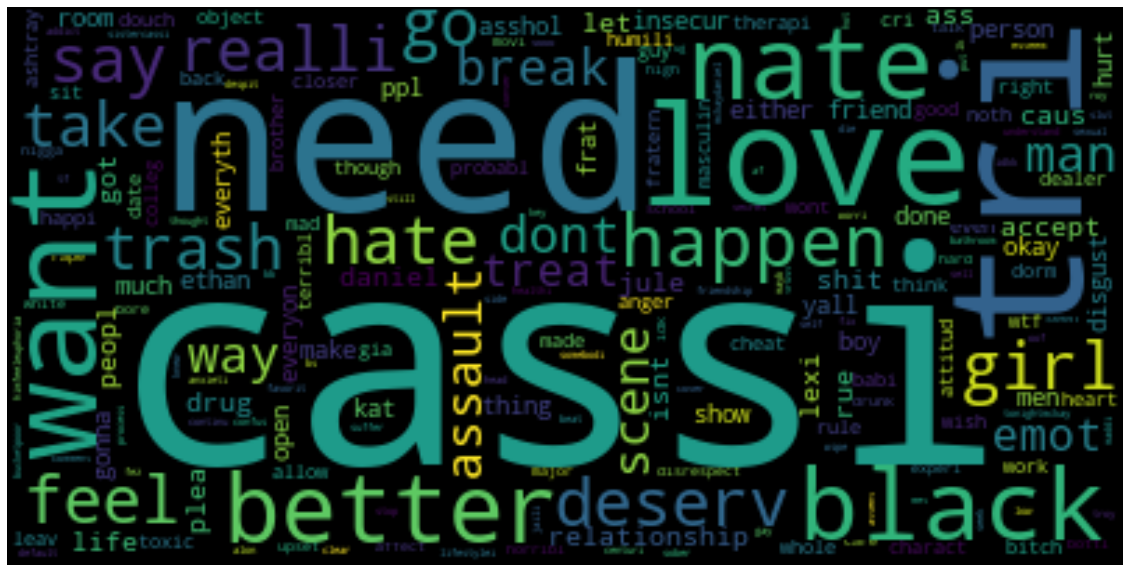

In [26]:
text = " ".join(i for i in mckay.Comment)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(20,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Interpretations and conclusions

The public opinion of Nate is overwhelmingly negative. And the public opinion of McKay is mostly neutral with a lot of people expressing concern for his mental wellbeing and wanting him to get out of the relationship with his girlfriend. 

# Future directions

Some next steps would be to perform the same sentiment analysis for the girlfriends to see how people react to the victims of the abuse. Deeper analysis could incorporate the demographic information of the tweet authors and preform statistical analysis to see if there are any significant differences in the opinions of the characters.